In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df=sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder=LabelEncoder()

In [6]:
df["species"]=encoder.fit_transform(df.species)

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df=df[df["species"]!=0][["sepal_width","petal_length","species"]]

In [9]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [10]:
import matplotlib.pyplot as plt

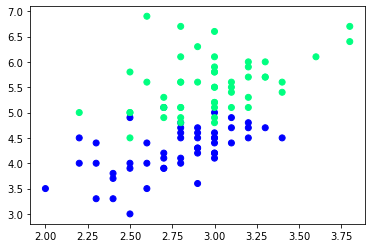

In [11]:
plt.scatter(df["sepal_width"],df["petal_length"],c=df["species"],cmap="winter")

In [12]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [13]:
df

,sepal_width,petal_length,species
121,2.8,4.9,2
100,3.3,6.0,2
72,2.5,4.9,1
147,3.0,5.2,2
76,2.8,4.8,1
...,...,...,...
113,2.5,5.0,2
65,3.1,4.4,1
117,3.8,6.7,2
108,2.5,5.8,2


In [14]:
df_train

,sepal_width,petal_length,species
136,3.4,5.6,2
146,2.5,5.0,2
83,2.7,5.1,1
104,3.0,5.8,2
57,2.4,3.3,1
74,2.9,4.3,1
145,3.0,5.2,2
63,2.9,4.7,1
110,3.2,5.1,2
138,3.0,4.8,2


In [15]:
df_val

,sepal_width,petal_length,species
53,2.3,4.0,1
93,2.3,3.3,1
89,2.5,4.0,1
118,2.6,6.9,2
79,2.6,3.5,1


In [16]:
df_test

,sepal_width,petal_length,species
132,2.8,5.6,2
130,2.8,6.1,2
141,3.1,5.1,2
50,3.2,4.7,1
131,3.8,6.4,2


In [17]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [18]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag


,sepal_width,petal_length,species
63,2.9,4.7,1
74,2.9,4.3,1
74,2.9,4.3,1
57,2.4,3.3,1
63,2.9,4.7,1
110,3.2,5.1,2
145,3.0,5.2,2
136,3.4,5.6,2


In [19]:
df_bag

,sepal_width,petal_length,species
63,2.9,4.7,1
74,2.9,4.3,1
74,2.9,4.3,1
57,2.4,3.3,1
63,2.9,4.7,1
110,3.2,5.1,2
145,3.0,5.2,2
136,3.4,5.6,2


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [21]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

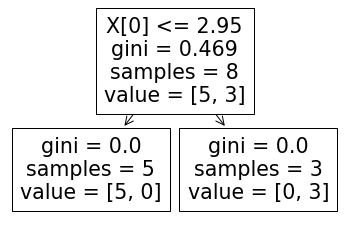

0.8


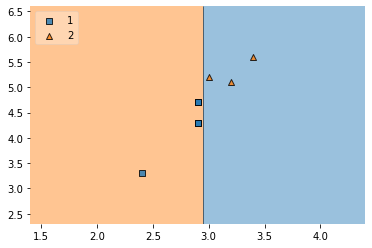

In [22]:
df_bag1=DecisionTreeClassifier()
evaluate(df_bag1,X,y)

In [23]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
138,3.0,4.8,2
138,3.0,4.8,2
110,3.2,5.1,2
136,3.4,5.6,2
74,2.9,4.3,1
74,2.9,4.3,1
104,3.0,5.8,2
136,3.4,5.6,2


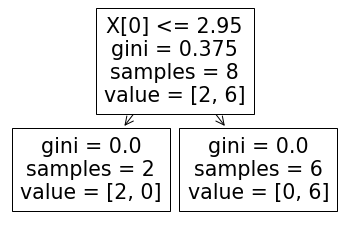

0.8


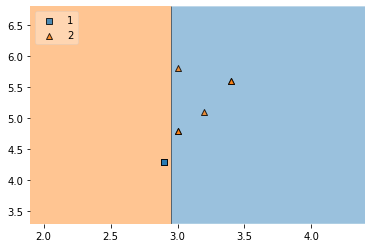

In [24]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
146,2.5,5.0,2
110,3.2,5.1,2
136,3.4,5.6,2
74,2.9,4.3,1
104,3.0,5.8,2
146,2.5,5.0,2
63,2.9,4.7,1
145,3.0,5.2,2


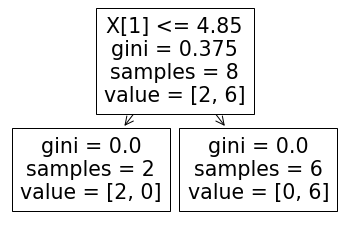

1.0


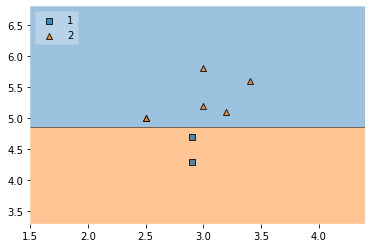

In [26]:

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [27]:
df_test

,sepal_width,petal_length,species
132,2.8,5.6,2
130,2.8,6.1,2
141,3.1,5.1,2
50,3.2,4.7,1
131,3.8,6.4,2


# predict

In [28]:
df_test

,sepal_width,petal_length,species
132,2.8,5.6,2
130,2.8,6.1,2
141,3.1,5.1,2
50,3.2,4.7,1
131,3.8,6.4,2


In [29]:
print("Predictor 1",df_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

<IPython.core.display.Javascript object>

Predictor 1 [1]


<IPython.core.display.Javascript object>

Predictor 2 [1]


<IPython.core.display.Javascript object>

Predictor 3 [2]


# Pasting

In [30]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
136,3.4,5.6,2
146,2.5,5.0,2
83,2.7,5.1,1
104,3.0,5.8,2
57,2.4,3.3,1
74,2.9,4.3,1
145,3.0,5.2,2
63,2.9,4.7,1
110,3.2,5.1,2
138,3.0,4.8,2


In [31]:
df_train.sample(8)


,sepal_width,petal_length,species
138,3.0,4.8,2
145,3.0,5.2,2
83,2.7,5.1,1
104,3.0,5.8,2
110,3.2,5.1,2
136,3.4,5.6,2
146,2.5,5.0,2
63,2.9,4.7,1


# Random Subspaces


In [32]:
# column sampling with or without sampling
df1=sns.load_dataset("iris")

In [33]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
df1.sample(2,replace=True,axis=1)

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


# Random Patches


In [35]:
#row sampling & column sampling
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)


,sepal_length,petal_width
14,5.8,0.2
126,6.2,1.8
136,6.3,2.4
126,6.2,1.8
52,6.9,1.5
12,4.8,0.1
94,5.6,1.3
126,6.2,1.8
